In [ ]:
#Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_card=pd.read_csv('credit_card_transactions.csv')
credit_card

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No


In [ ]:
credit_card.shape

(5000, 15)

In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [ ]:
credit_card.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [ ]:
credit_card.tail()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No
4999,D501WH15,Visa,Healthcare,34672.0,2023-12-30 11:41:36,Jaipur,North,60.0,NaN,58261.0,39412.26,50000.0,Mobile,Saturday,No


In [3]:
#label encoding to convert to ordinal data
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

#convert new copy to the data
credit_card_encoded=credit_card.copy()

for col in credit_card_encoded.select_dtypes(include=['object']):
    credit_card_encoded[col]=label_encoder.fit_transform(credit_card_encoded[col])

In [ ]:
credit_card_encoded

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413,1,7,27214.0,0,10,0,23.0,0,94632.0,36369.65,100000.0,4,6,0
1,4138,0,5,83956.0,1,12,3,49.0,1,148118.0,89179.12,150000.0,1,0,0
2,3323,3,6,193280.0,2,10,0,NaN,1,210921.0,106668.60,200000.0,1,2,0
3,3775,2,4,167381.0,3,12,3,52.0,0,148070.0,173155.52,200000.0,1,2,1
4,1925,2,5,81170.0,4,8,1,37.0,0,174470.0,52713.09,200000.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2508,2,1,36508.0,4995,3,1,33.0,0,63015.0,34192.55,50000.0,0,0,1
4996,1853,0,4,42920.0,4996,2,2,NaN,0,NaN,19680.39,100000.0,0,0,0
4997,3487,3,3,33788.0,4997,11,3,56.0,1,60868.0,33876.96,50000.0,1,2,0
4998,921,2,2,38679.0,4998,2,2,60.0,1,66948.0,32988.22,50000.0,1,2,0


In [ ]:
credit_card_encoded.describe()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
count,5000.000000,5000.000000,5000.000000,4994.000000,5000.000000,5000.000000,5000.000000,4865.000000,5000.000000,4686.000000,4792.000000,4991.000000,5000.000000,5000.000000,5000.00000
mean,2499.500000,1.887800,3.706200,74667.995995,2499.500000,6.066800,1.788600,49.106680,0.520000,137353.817542,63058.343566,124654.377880,2.044400,3.018600,0.26640
std,1443.520003,1.057655,2.115083,43089.045623,1443.520003,3.749126,1.039484,18.398524,0.534095,69471.623020,40056.989704,55668.246494,1.438625,1.971251,0.44212
min,0.000000,0.000000,0.000000,25008.000000,0.000000,0.000000,0.000000,18.000000,0.000000,35005.000000,10282.410000,50000.000000,0.000000,0.000000,0.00000
25%,1249.750000,1.000000,2.000000,39742.500000,1249.750000,3.000000,1.000000,33.000000,0.000000,73485.000000,33336.742500,100000.000000,1.000000,1.000000,0.00000
50%,2499.500000,2.000000,4.000000,60922.000000,2499.500000,6.000000,2.000000,49.000000,1.000000,131833.000000,49547.945000,100000.000000,2.000000,3.000000,0.00000
75%,3749.250000,3.000000,5.000000,98373.500000,3749.250000,9.000000,3.000000,65.000000,1.000000,189054.250000,83732.352500,150000.000000,3.000000,5.000000,1.00000
max,4999.000000,4.000000,8.000000,199923.000000,4999.000000,12.000000,3.000000,80.000000,2.000000,299907.000000,199898.290000,200000.000000,5.000000,6.000000,1.00000


In [ ]:
#Exploratory Data Analysis (EDA):

#plot distribution using plotly
import plotly.express as px

px.scatter(credit_card,x='Transaction_ID',y='Card_Type',color='Card_Type')

In [ ]:
px.line(credit_card,x='Transaction_ID',y='Merchant_Category',color='Merchant_Category')

In [ ]:
px.bar(credit_card,x='Transaction_ID',y='Location',color='Location')

Measure Central Tendency-A measure central tendency is a statistical tool used to summarize set of data.this central tendency used these three **Mean ,Median,Mode** to summarize data.

In [ ]:
credit1=credit_card['Transaction_Amount'].mean()
print("Average of transaction Amount:",credit1)

Average of transaction Amount: 74667.99599519423


In [ ]:
credit2=credit_card['Transaction_Amount'].median()
print("meadian of transaction Amount:",credit2)

meadian of transaction Amount: 60922.0


In [ ]:
credit3=credit_card['Transaction_Amount'].mode()
print("Mode of transaction Amount:",credit3)

Mode of transaction Amount: 0    25207.0
1    59675.0
Name: Transaction_Amount, dtype: float64


In [ ]:
credit4=credit_card['Cardholder_Age'].mean()
credit4

49.106680369989725

In [ ]:
credit5=credit_card['Cardholder_Age'].median()
credit5


49.0

In [ ]:
credit6=credit_card['Cardholder_Age'].mode()
credit6

,Cardholder_Age
0,26.0


In [ ]:
credit7=credit_card['Cardholder_Monthly_Income'].mean()
print("Average of Cardholder Monthly Income:",credit7)

Average of Cardholder Monthly Income: 137353.8175416133


In [ ]:
credit8=credit_card['Cardholder_Monthly_Income'].median()
print("meadian of Cardholder Monthly Income:",credit8)


meadian of Cardholder Monthly Income: 131833.0


In [ ]:
credit9=credit_card['Cardholder_Monthly_Income'].mode()
print("Mode of Cardholder Monthly Income:",credit9)


Mode of Cardholder Monthly Income: 0      35555.0
1      35589.0
2      41486.0
3      44429.0
4      44637.0
5      60209.0
6      60790.0
7      63147.0
8      63403.0
9      63855.0
10     64225.0
11     70190.0
12     70234.0
13     75905.0
14     78951.0
15     80046.0
16     83224.0
17     85372.0
18     86515.0
19     93707.0
20    105011.0
21    108255.0
22    109507.0
23    110322.0
24    114938.0
25    117940.0
26    119334.0
27    120141.0
28    120577.0
29    122137.0
30    124641.0
31    129435.0
32    130101.0
33    135888.0
34    138027.0
35    141121.0
36    142403.0
37    143159.0
38    145969.0
39    146125.0
40    147148.0
41    159738.0
42    169320.0
43    171912.0
44    172583.0
45    173344.0
46    176887.0
47    178588.0
48    181559.0
49    182020.0
50    183353.0
51    196936.0
52    197813.0
53    200771.0
54    207667.0
55    211124.0
56    211721.0
57    266478.0
Name: Cardholder_Monthly_Income, dtype: float64


In [ ]:
credit10=credit_card['Cardholder_Average_Spend'].mean()
print("Average of Cardholder Average Spend:",credit10)


Average of Cardholder Average Spend: 63058.3435663606


In [ ]:
credit11=credit_card['Cardholder_Average_Spend'].median()
print("meadian of Cardholder Average Spend:",credit11)


meadian of Cardholder Average Spend: 49547.945


In [ ]:
credit12=credit_card['Cardholder_Average_Spend'].mode()
print("mode of Cardholder Average Spend:",credit12)


mode of Cardholder Average Spend: 0    51885.56
Name: Cardholder_Average_Spend, dtype: float64


spread- measure central dispersion is called spread.**Range,Variance and Standard deviation**

In [ ]:
credit13=credit_card['Transaction_Amount'].min()
credit13

25008.0

In [ ]:
credit14=credit_card['Transaction_Amount'].max()
credit14


199923.0

In [ ]:
credit15=credit_card['Transaction_Amount'].std()
credit15

43089.04562312538

In [ ]:
credit16=credit_card['Cardholder_Age'].min()
credit16


18.0

In [ ]:
credit17=credit_card['Cardholder_Age'].max()
credit17


80.0

In [ ]:
credit18=credit_card['Cardholder_Age'].std()
credit18


18.398523883823223

In [ ]:
credit19=credit_card['Cardholder_Age'].var()
credit19

338.50568110361354

In [ ]:
credit20=credit_card['Cardholder_Monthly_Income'].min()
credit20


35005.0

In [ ]:
credit21=credit_card['Cardholder_Monthly_Income'].max()
credit21

299907.0

In [ ]:
credit22=credit_card['Cardholder_Monthly_Income'].std()
credit22

69471.62301992845

In [ ]:
credit23=credit_card['Cardholder_Monthly_Income'].var()
credit23

4826306405.023053

In [ ]:
credit24=credit_card['Cardholder_Average_Spend'].min()
credit24

10282.41

In [ ]:
credit25=credit_card['Cardholder_Average_Spend'].max()
credit25


199898.29

In [ ]:
credit24=credit_card['Cardholder_Average_Spend'].std()
credit24

40056.989703958934

In [ ]:
credit25=credit_card['Cardholder_Average_Spend'].var()
credit25

1604562424.1430721

*Bivariented* Analysis


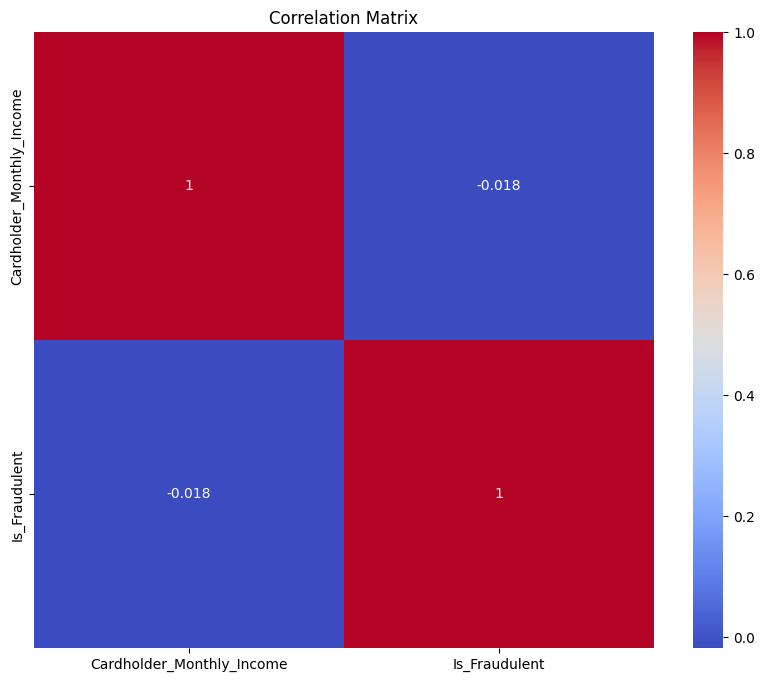

In [ ]:
#corrleation Matrix
plt.figure(figsize=(10,8))
correlation_matrix=credit_card_encoded[['Cardholder_Monthly_Income','Is_Fraudulent']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

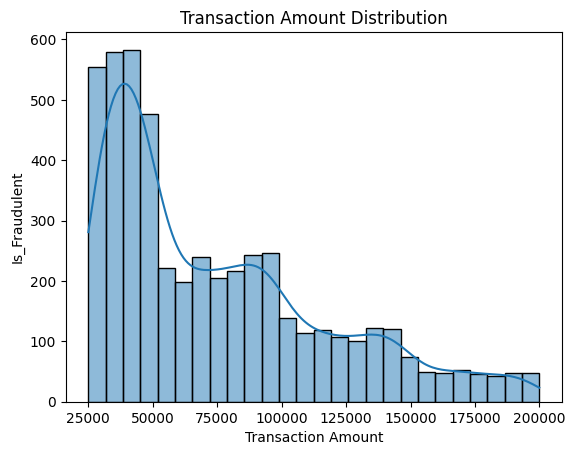

In [ ]:
#Univariate
sns.histplot(credit_card['Transaction_Amount'],kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Is_Fraudulent')
plt.show()

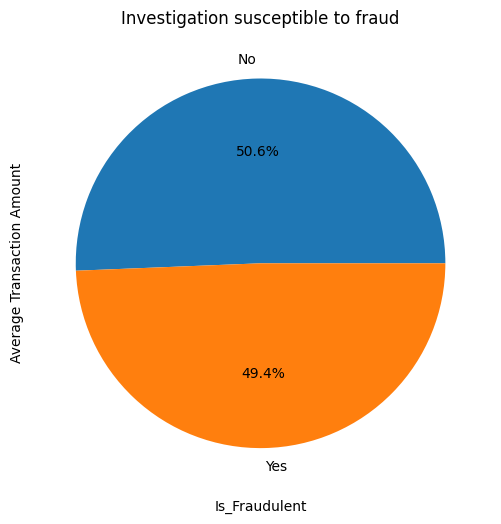

In [ ]:
plt.figure(figsize=(10,6))
ax=credit_card.groupby('Is_Fraudulent')['Transaction_Amount'].mean().plot(kind='pie',autopct='%1.1f%%')
plt.title('Investigation susceptible to fraud')
plt.xlabel('Is_Fraudulent')
plt.ylabel('Average Transaction Amount')
plt.show()

In [4]:
#2) Data Preprocessing - Data Cleaning:
credit_card_encoded.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,0
Cardholder_Monthly_Income,314


In [5]:
Transaction_Amount=credit_card_encoded['Transaction_Amount'].mode()[0]
Transaction_Amount

25207.0

In [6]:
credit_card_encoded['Transaction_Amount']=credit_card_encoded['Transaction_Amount'].fillna(Transaction_Amount)
credit_card_encoded

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413,1,7,27214.0,0,10,0,23.0,0,94632.0,36369.65,100000.0,4,6,0
1,4138,0,5,83956.0,1,12,3,49.0,1,148118.0,89179.12,150000.0,1,0,0
2,3323,3,6,193280.0,2,10,0,NaN,1,210921.0,106668.60,200000.0,1,2,0
3,3775,2,4,167381.0,3,12,3,52.0,0,148070.0,173155.52,200000.0,1,2,1
4,1925,2,5,81170.0,4,8,1,37.0,0,174470.0,52713.09,200000.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2508,2,1,36508.0,4995,3,1,33.0,0,63015.0,34192.55,50000.0,0,0,1
4996,1853,0,4,42920.0,4996,2,2,NaN,0,NaN,19680.39,100000.0,0,0,0
4997,3487,3,3,33788.0,4997,11,3,56.0,1,60868.0,33876.96,50000.0,1,2,0
4998,921,2,2,38679.0,4998,2,2,60.0,1,66948.0,32988.22,50000.0,1,2,0


In [7]:
Cardholder_Age=credit_card_encoded['Cardholder_Age'].mean()
Cardholder_Age

49.106680369989725

In [8]:
credit_card_encoded['Cardholder_Age']=credit_card_encoded['Cardholder_Age'].fillna(Cardholder_Age)
credit_card_encoded

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413,1,7,27214.0,0,10,0,23.00000,0,94632.0,36369.65,100000.0,4,6,0
1,4138,0,5,83956.0,1,12,3,49.00000,1,148118.0,89179.12,150000.0,1,0,0
2,3323,3,6,193280.0,2,10,0,49.10668,1,210921.0,106668.60,200000.0,1,2,0
3,3775,2,4,167381.0,3,12,3,52.00000,0,148070.0,173155.52,200000.0,1,2,1
4,1925,2,5,81170.0,4,8,1,37.00000,0,174470.0,52713.09,200000.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2508,2,1,36508.0,4995,3,1,33.00000,0,63015.0,34192.55,50000.0,0,0,1
4996,1853,0,4,42920.0,4996,2,2,49.10668,0,NaN,19680.39,100000.0,0,0,0
4997,3487,3,3,33788.0,4997,11,3,56.00000,1,60868.0,33876.96,50000.0,1,2,0
4998,921,2,2,38679.0,4998,2,2,60.00000,1,66948.0,32988.22,50000.0,1,2,0


In [9]:
Cardholder_Monthly_Income=credit_card_encoded['Cardholder_Monthly_Income'].mean()
Cardholder_Monthly_Income

137353.8175416133

In [10]:
credit_card_encoded['Cardholder_Monthly_Income']=credit_card_encoded['Cardholder_Monthly_Income'].fillna(Cardholder_Monthly_Income)
credit_card_encoded

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413,1,7,27214.0,0,10,0,23.00000,0,94632.000000,36369.65,100000.0,4,6,0
1,4138,0,5,83956.0,1,12,3,49.00000,1,148118.000000,89179.12,150000.0,1,0,0
2,3323,3,6,193280.0,2,10,0,49.10668,1,210921.000000,106668.60,200000.0,1,2,0
3,3775,2,4,167381.0,3,12,3,52.00000,0,148070.000000,173155.52,200000.0,1,2,1
4,1925,2,5,81170.0,4,8,1,37.00000,0,174470.000000,52713.09,200000.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2508,2,1,36508.0,4995,3,1,33.00000,0,63015.000000,34192.55,50000.0,0,0,1
4996,1853,0,4,42920.0,4996,2,2,49.10668,0,137353.817542,19680.39,100000.0,0,0,0
4997,3487,3,3,33788.0,4997,11,3,56.00000,1,60868.000000,33876.96,50000.0,1,2,0
4998,921,2,2,38679.0,4998,2,2,60.00000,1,66948.000000,32988.22,50000.0,1,2,0


In [11]:
Cardholder_Average_Spend=credit_card_encoded['Cardholder_Average_Spend'].mean()
Cardholder_Average_Spend

63058.3435663606

In [12]:
credit_card_encoded['Cardholder_Average_Spend']=credit_card_encoded['Cardholder_Average_Spend'].fillna(Cardholder_Average_Spend)
credit_card_encoded

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413,1,7,27214.0,0,10,0,23.00000,0,94632.000000,36369.65,100000.0,4,6,0
1,4138,0,5,83956.0,1,12,3,49.00000,1,148118.000000,89179.12,150000.0,1,0,0
2,3323,3,6,193280.0,2,10,0,49.10668,1,210921.000000,106668.60,200000.0,1,2,0
3,3775,2,4,167381.0,3,12,3,52.00000,0,148070.000000,173155.52,200000.0,1,2,1
4,1925,2,5,81170.0,4,8,1,37.00000,0,174470.000000,52713.09,200000.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2508,2,1,36508.0,4995,3,1,33.00000,0,63015.000000,34192.55,50000.0,0,0,1
4996,1853,0,4,42920.0,4996,2,2,49.10668,0,137353.817542,19680.39,100000.0,0,0,0
4997,3487,3,3,33788.0,4997,11,3,56.00000,1,60868.000000,33876.96,50000.0,1,2,0
4998,921,2,2,38679.0,4998,2,2,60.00000,1,66948.000000,32988.22,50000.0,1,2,0


In [13]:
Credit_Limit=credit_card_encoded['Credit_Limit'].mode()[0]
Credit_Limit

100000.0

In [14]:
credit_card_encoded['Credit_Limit']=credit_card_encoded['Credit_Limit'].fillna(Credit_Limit)
credit_card_encoded

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413,1,7,27214.0,0,10,0,23.00000,0,94632.000000,36369.65,100000.0,4,6,0
1,4138,0,5,83956.0,1,12,3,49.00000,1,148118.000000,89179.12,150000.0,1,0,0
2,3323,3,6,193280.0,2,10,0,49.10668,1,210921.000000,106668.60,200000.0,1,2,0
3,3775,2,4,167381.0,3,12,3,52.00000,0,148070.000000,173155.52,200000.0,1,2,1
4,1925,2,5,81170.0,4,8,1,37.00000,0,174470.000000,52713.09,200000.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2508,2,1,36508.0,4995,3,1,33.00000,0,63015.000000,34192.55,50000.0,0,0,1
4996,1853,0,4,42920.0,4996,2,2,49.10668,0,137353.817542,19680.39,100000.0,0,0,0
4997,3487,3,3,33788.0,4997,11,3,56.00000,1,60868.000000,33876.96,50000.0,1,2,0
4998,921,2,2,38679.0,4998,2,2,60.00000,1,66948.000000,32988.22,50000.0,1,2,0


In [15]:
credit_card_encoded.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


**missing values-**
Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit these columns have missing values.
all missing values handl in mean,median and mode category.


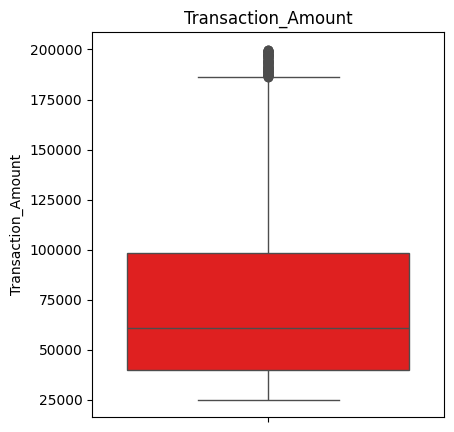

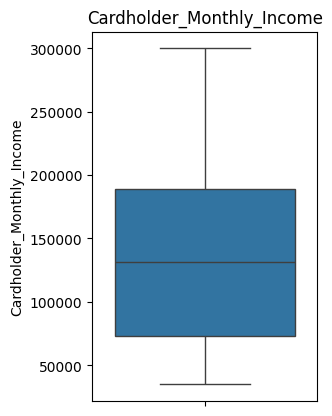

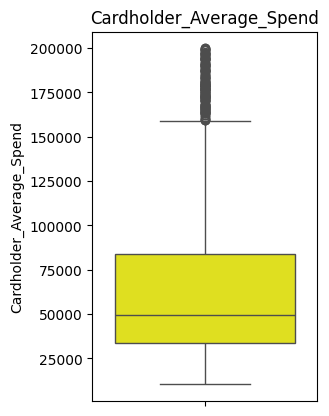

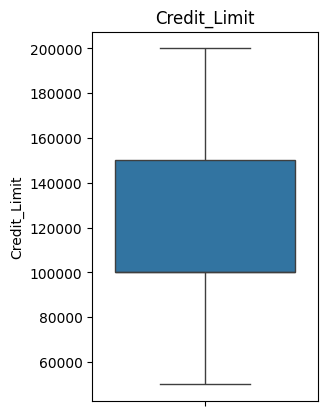

In [16]:
#outliers
#Box Plot of Numerical Columns:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(credit_card['Transaction_Amount'],color='red')
plt.title('Transaction_Amount')
plt.show()

plt.subplot(1,2,2)
sns.boxplot(credit_card['Cardholder_Monthly_Income'])
plt.title('Cardholder_Monthly_Income')
plt.show()

plt.subplot(1,2,1)
sns.boxplot(credit_card['Cardholder_Average_Spend'],color='yellow')
plt.title('Cardholder_Average_Spend')
plt.show()

plt.subplot(1,2,2)
sns.boxplot(credit_card['Credit_Limit'])
plt.title('Credit_Limit')
plt.show()




Outlier of numerical features only having outliers in transaction amount and cardholder average spend.others numerical features no need to remove outliers.


In [17]:
#Remove Outlier
from scipy import stats
credited=credit_card_encoded.copy()
credited['z_scores'] = stats.zscore(credit_card_encoded['Transaction_Amount'])
credited

z_score_threshold=2
credited_card = credited[(credited['z_scores']<= z_score_threshold) & (credited['z_scores']>=-z_score_threshold)]
credited_card

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,z_scores
0,4413,1,7,27214.0,0,10,0,23.00000,0,94632.000000,36369.65,100000.0,4,6,0,-1.099825
1,4138,0,5,83956.0,1,12,3,49.00000,1,148118.000000,89179.12,150000.0,1,0,0,0.216912
4,1925,2,5,81170.0,4,8,1,37.00000,0,174470.000000,52713.09,200000.0,2,2,0,0.152261
5,1670,2,2,131918.0,5,9,3,80.00000,1,166671.000000,80393.44,150000.0,3,2,0,1.329902
6,4644,3,5,139036.0,6,12,3,33.00000,1,171991.000000,84215.74,150000.0,1,3,1,1.495080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2508,2,1,36508.0,4995,3,1,33.00000,0,63015.000000,34192.55,50000.0,0,0,1,-0.884151
4996,1853,0,4,42920.0,4996,2,2,49.10668,0,137353.817542,19680.39,100000.0,0,0,0,-0.735356
4997,3487,3,3,33788.0,4997,11,3,56.00000,1,60868.000000,33876.96,50000.0,1,2,0,-0.947271
4998,921,2,2,38679.0,4998,2,2,60.00000,1,66948.000000,32988.22,50000.0,1,2,0,-0.833772


In [18]:
credited['z_scores_Cardholder'] = stats.zscore(credit_card_encoded['Cardholder_Average_Spend'])
credited

z_score_threshold=2
credited_card = credited[(credited['z_scores_Cardholder']<= z_score_threshold) & (credited['z_scores_Cardholder']>=-z_score_threshold)]
credited_card

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,z_scores,z_scores_Cardholder
0,4413,1,7,27214.0,0,10,0,23.00000,0,94632.000000,36369.65,100000.0,4,6,0,-1.099825,-0.680645
1,4138,0,5,83956.0,1,12,3,49.00000,1,148118.000000,89179.12,150000.0,1,0,0,0.216912,0.666162
2,3323,3,6,193280.0,2,10,0,49.10668,1,210921.000000,106668.60,200000.0,1,2,0,2.753849,1.112198
4,1925,2,5,81170.0,4,8,1,37.00000,0,174470.000000,52713.09,200000.0,2,2,0,0.152261,-0.263836
5,1670,2,2,131918.0,5,9,3,80.00000,1,166671.000000,80393.44,150000.0,3,2,0,1.329902,0.442099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2508,2,1,36508.0,4995,3,1,33.00000,0,63015.000000,34192.55,50000.0,0,0,1,-0.884151,-0.736168
4996,1853,0,4,42920.0,4996,2,2,49.10668,0,137353.817542,19680.39,100000.0,0,0,0,-0.735356,-1.106274
4997,3487,3,3,33788.0,4997,11,3,56.00000,1,60868.000000,33876.96,50000.0,1,2,0,-0.947271,-0.744217
4998,921,2,2,38679.0,4998,2,2,60.00000,1,66948.000000,32988.22,50000.0,1,2,0,-0.833772,-0.766882


In [ ]:
credited_card.shape

(4723, 17)

the outlier are removed from the dataset.total 277 outlier points are reomed from the data.


In [19]:
IQR1=credited_card['Transaction_Amount'].quantile(0.25)
IQR3=credited_card['Transaction_Amount'].quantile(0.75)
IQR=IQR3-IQR1

lower_bound=IQR3-1.5*IQR
upper_bound=IQR3+1.5*IQR
print(IQR)
print(lower_bound)
print(upper_bound)

53979.5
11976.75
173915.25


In [20]:
IQR1=credited_card['Cardholder_Average_Spend'].quantile(0.25)
IQR3=credited_card['Cardholder_Average_Spend'].quantile(0.75)
IQR=IQR3-IQR1

lower_bound=IQR3-1.5*IQR
upper_bound=IQR3+1.5*IQR
print(IQR)
print(lower_bound)
print(upper_bound)

42539.829999999994
11785.044999999998
139404.53499999997


In [ ]:
#skewness

<Axes: xlabel='Transaction_Amount', ylabel='Density'>

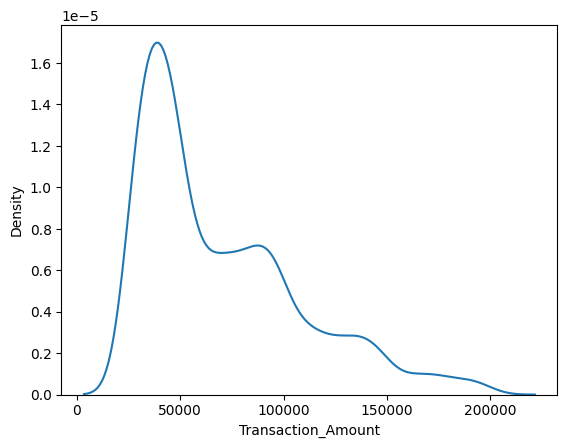

In [ ]:
#distribution of dataset to find skwee
sns.kdeplot(credited_card['Transaction_Amount'])

transaction amount data is positive skewness.


<Axes: xlabel='Cardholder_Average_Spend', ylabel='Density'>

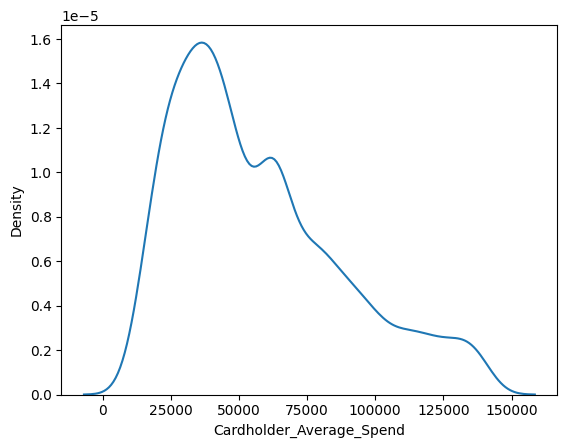

In [ ]:
sns.kdeplot(credited_card['Cardholder_Average_Spend'])


cardholder Average spend this data also positive skewness.

<Axes: xlabel='Cardholder_Monthly_Income', ylabel='Density'>

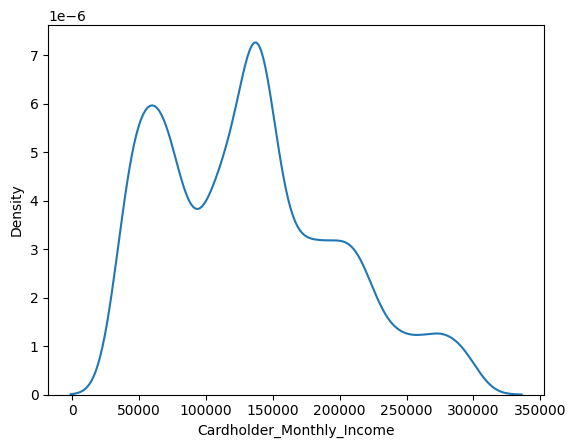

In [ ]:
sns.kdeplot(credited_card['Cardholder_Monthly_Income'])

cardholder monthly income data is consider mean skewness


In [21]:
import warnings

warnings.filterwarnings('ignore')

In [22]:
#log transformation
credited_card['Transaction_Amount_log']=np.log1p(credited_card['Transaction_Amount'])

<Axes: xlabel='Transaction_Amount_log', ylabel='Density'>

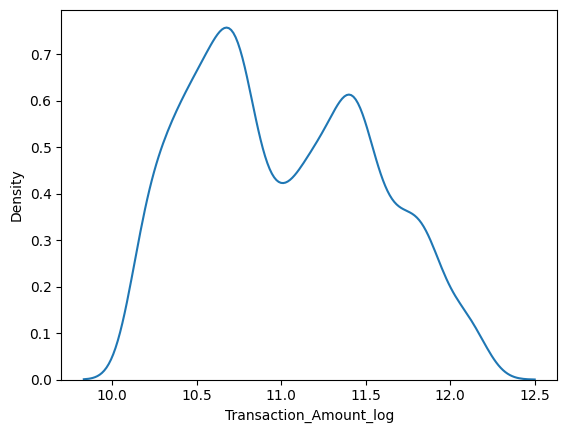

In [23]:
sns.kdeplot(credited_card['Transaction_Amount_log'])

<Axes: xlabel='Cardholder_Average_Spend_sqrt', ylabel='Density'>

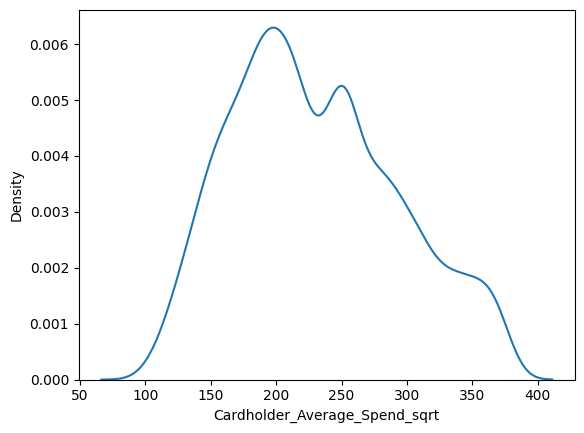

In [24]:
credited_card['Cardholder_Average_Spend_sqrt']=np.sqrt(credited_card['Cardholder_Average_Spend'])

sns.kdeplot(credited_card['Cardholder_Average_Spend_sqrt'])

<Axes: xlabel='Cardholder_Monthly_Income_sqrt', ylabel='Density'>

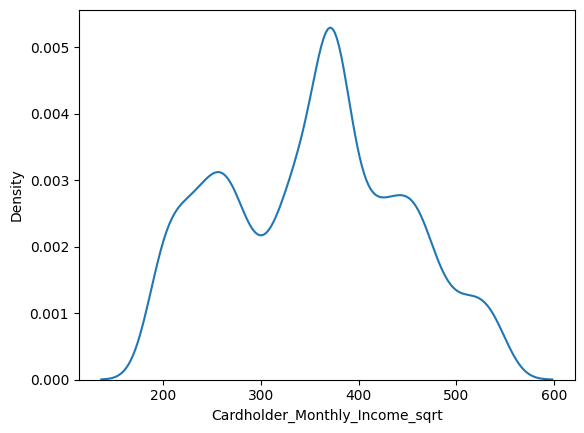

In [25]:
credited_card['Cardholder_Monthly_Income_sqrt']=np.sqrt(credited_card['Cardholder_Monthly_Income'])

sns.kdeplot(credited_card['Cardholder_Monthly_Income_sqrt'])

In [26]:
#Feature Engineering:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
credit_card['encoded_Region']=labelencoder.fit_transform(credit_card['Region'])
credit_card

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,encoded_Region
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No,0
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No,3
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No,0
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes,3
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes,1
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No,2
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No,3
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No,2


Im using label encoder to change region values of East,Weast,North South to consider 0,1,2,3

In [27]:
#one hot encoder
from sklearn.preprocessing import OneHotEncoder

credit_card_one_hot=pd.get_dummies(credit_card.Location,prefix='Location')
credit_card_one_hot=credit_card_one_hot.astype(int)
credit_card_one_hot

,Location_Ahmedabad,Location_Bengaluru,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Lucknow,Location_Mumbai,Location_Patna,Location_Pune,Location_Surat
0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,1,0,0,0,0,0,0,0,0,0
4996,0,0,1,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,0,1,0
4998,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
newcredit_card=pd.concat([credit_card,credit_card_one_hot],axis=1)
newcredit_card

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,...,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Lucknow,Location_Mumbai,Location_Patna,Location_Pune,Location_Surat
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,...,0,0,0,0,0,0,0,1,0,0
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,...,0,0,0,0,0,0,0,0,0,1
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,...,0,0,0,0,0,0,0,1,0,0
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,...,0,0,0,0,0,0,0,0,0,1
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,...,1,0,0,0,0,0,0,0,0,0
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,...,0,0,0,0,0,0,0,0,0,0
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,...,0,0,0,0,0,0,0,0,1,0
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Feature Selection:
from sklearn.feature_selection import SelectKBest, f_regression

x=credit_card_encoded[['Merchant_Category','Transaction_Amount','Credit_Limit']] #Feature
y=credit_card_encoded['Is_Fraudulent'] #target



In [29]:
selector=SelectKBest(score_func=f_regression,k=2)
x_new=selector.fit_transform(x, y)
feature_scores=x.columns[selector.get_support()]
print("feature_scores:",feature_scores)

feature_scores: Index(['Merchant_Category', 'Transaction_Amount'], dtype='object')


 the best feature selection Merchant_Category,Transaction_Amount these two features to best for identifying target.

In [30]:
#Split data into training and testing:
from sklearn.model_selection import train_test_split

X=credit_card_encoded[['Merchant_Category','Transaction_Amount']] #features
Y=credit_card_encoded['Is_Fraudulent']  #target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [31]:
print("training features:",X_train)
print("training target:",Y_train)
print("testing features:",X_test)
print("testing target:",Y_test)

training features:       Merchant_Category  Transaction_Amount
4227                  3             61963.0
4676                  2            188969.0
800                   2            148938.0
3671                  7             96266.0
4193                  4             94463.0
...                 ...                 ...
4426                  4             40204.0
466                   7            138372.0
3092                  6             46246.0
3772                  2            130856.0
860                   3             56781.0

[4000 rows x 2 columns]
training target: 4227    1
4676    0
800     0
3671    0
4193    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: Is_Fraudulent, Length: 4000, dtype: int64
testing features:       Merchant_Category  Transaction_Amount
1501                  4             38429.0
2586                  3             75548.0
2653                  5             97762.0
1055                  2             35172.0
705            

In [32]:
#Feature Scaling:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
credit_card_encoded_normalization=pd.DataFrame(scaler.fit_transform(credit_card_encoded),columns=credit_card_encoded.columns)
credit_card_encoded_normalization

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,0.882777,0.25,0.875,0.012612,0.0000,0.833333,0.000000,0.080645,0.0,0.225091,0.137579,0.333333,0.8,1.000000,0.0
1,0.827766,0.00,0.625,0.337009,0.0002,1.000000,1.000000,0.500000,0.5,0.426999,0.416087,0.666667,0.2,0.000000,0.0
2,0.664733,0.75,0.750,0.962022,0.0004,0.833333,0.000000,0.501721,0.5,0.664080,0.508323,1.000000,0.2,0.333333,0.0
3,0.755151,0.50,0.500,0.813955,0.0006,1.000000,1.000000,0.548387,0.0,0.426818,0.858963,1.000000,0.2,0.333333,1.0
4,0.385077,0.50,0.625,0.321082,0.0008,0.666667,0.333333,0.306452,0.0,0.526478,0.223772,1.000000,0.4,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.501700,0.50,0.125,0.065746,0.9992,0.250000,0.333333,0.241935,0.0,0.105737,0.126098,0.000000,0.0,0.000000,1.0
4996,0.370674,0.00,0.500,0.102404,0.9994,0.166667,0.666667,0.501721,0.0,0.386365,0.049563,0.333333,0.0,0.000000,0.0
4997,0.697540,0.75,0.375,0.050196,0.9996,0.916667,1.000000,0.612903,0.5,0.097632,0.124433,0.000000,0.2,0.333333,0.0
4998,0.184237,0.50,0.250,0.078158,0.9998,0.166667,0.666667,0.677419,0.5,0.120584,0.119746,0.000000,0.2,0.333333,0.0


In [33]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
credit_card_encoded_standardised=pd.DataFrame(scaler.fit_transform(credit_card_encoded),columns=credit_card_encoded.columns)
credit_card_encoded_standardised

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,1.325712,-0.839488,1.557447,-1.099825,-1.731704,1.049203,-1.720834,-1.438656e+00,-0.973708,-6.352907e-01,-0.680645,-0.442448,1.359489,1.512592,-0.602612
1,1.135186,-1.785070,0.611763,0.216912,-1.731012,1.582714,1.165503,-5.878814e-03,0.898807,1.600677e-01,0.666162,0.456471,-0.726043,-1.531465,-0.602612
2,0.570538,1.051676,1.084605,2.753849,-1.730319,1.049203,-1.720834,3.915574e-16,0.898807,1.093974e+00,1.112198,1.355390,-0.726043,-0.516779,-0.602612
3,0.883692,0.106094,0.138921,2.152845,-1.729626,1.582714,1.165503,1.594416e-01,-0.973708,1.593540e-01,2.807823,1.355390,-0.726043,-0.516779,1.659444
4,-0.398025,0.106094,0.611763,0.152261,-1.728933,0.515692,-0.758722,-6.671605e-01,-0.973708,5.519326e-01,-0.263836,1.355390,-0.030866,-0.516779,-0.602612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.005889,0.106094,-1.279605,-0.884151,1.728933,-0.818086,-0.758722,-8.875877e-01,-0.973708,-1.105448e+00,-0.736168,-1.341367,-1.421221,-1.531465,1.659444
4996,-0.447908,-1.785070,0.138921,-0.735356,1.729626,-1.084841,0.203391,3.915574e-16,-0.973708,-4.327857e-16,-1.106274,-0.442448,-1.421221,-1.531465,-0.602612
4997,0.684160,1.051676,-0.333921,-0.947271,1.730319,1.315958,1.165503,3.798688e-01,0.898807,-1.137375e+00,-0.744217,-1.341367,-0.726043,-0.516779,-0.602612
4998,-1.093617,0.106094,-0.806763,-0.833772,1.731012,-1.084841,0.203391,6.002960e-01,0.898807,-1.046963e+00,-0.766882,-1.341367,-0.726043,-0.516779,-0.602612


**Logistic Regression**

Logistic Regression ia a supervised  learning algorithm used for binary classification problem.

In [34]:
#Build the Machine Learning Model:
#Logistic Regression:
X=credit_card_encoded[['Merchant_Category']] #features
Y=credit_card_encoded['Is_Fraudulent']  #target

In [35]:
#Logistic Regression:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

#train the model

model.fit(X,Y)

LogisticRegression()

In [36]:
from sklearn.model_selection import train_test_split

#split the dataset 75% for training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [37]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()

#train the model with the training set
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

#calculate accuracy
print("Accuracy:",accuracy_score(Y_test,Y_pred))

Accuracy: 0.7304


In [39]:
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

Accuracy Score:  0.7304
Confusion Matrix: 
 [[913   0]
 [337   0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       913
           1       0.00      0.00      0.00       337

    accuracy                           0.73      1250
   macro avg       0.37      0.50      0.42      1250
weighted avg       0.53      0.73      0.62      1250



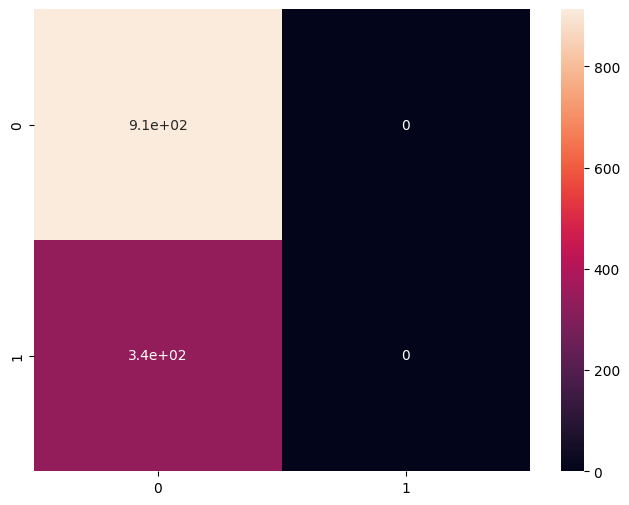

In [40]:
# evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy Score: ', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix: \n', confusion_matrix(Y_test, Y_pred))
print('Classification Report: \n', classification_report(Y_test, Y_pred))

#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)
plt.show()

**NaiveBayes**

naive bayas classifier is a probabilistic machine learning Algorithm based on **Bayas theorem** primarily used classification task.


In [ ]:
#NaiveBayes:
X=credit_card_encoded[['Merchant_Category','Transaction_Amount']] #features
Y=credit_card_encoded['Is_Fraudulent']  #target

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report

# create  and train the navie bayas model
nb_model=GaussianNB()
nb_model.fit(X_train,Y_train)

Y_pred_nb=nb_model.predict(X_test)
accuracy_nb=accuracy_score(Y_test,Y_pred_nb)
print("naive bayes Accuraccy:",accuracy_nb)
print("naive bayes Classification Report:\n",classification_report(Y_test,Y_pred_nb))


naive bayes Accuraccy: 0.753
naive bayes Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       753
           1       0.00      0.00      0.00       247

    accuracy                           0.75      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.57      0.75      0.65      1000



**NaiveBayes**

navive bayas accuracy 0.753.

the classification **F1-score** of better than other score.

**Decision Tree**

It's a popular machine leaning alorithm used for classification  and regression task.it models decision and their possible consequences as a tree like structure.

In [ ]:
X=credit_card_encoded[['Merchant_Category']] #features
Y=credit_card_encoded['Is_Fraudulent']  #target

In [ ]:
#Decision Tree - Model Building and Evaluation:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
model.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

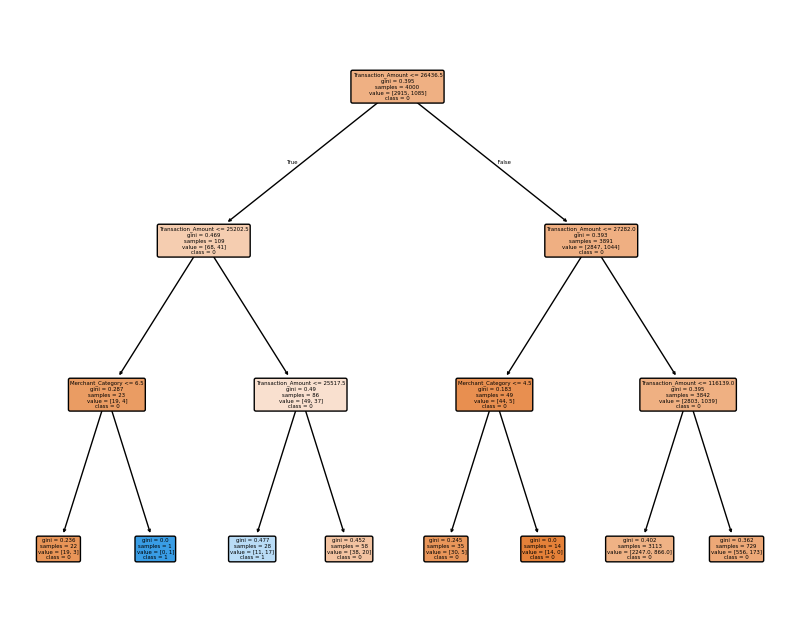

In [ ]:
plt.figure(figsize=(10,8))
plot_tree(model,filled=True,feature_names=X_train.columns,class_names=Y.unique().astype(str),rounded=True)
plt.show()

In [ ]:
#accuracy:
from sklearn.metrics import accuracy_score
Y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred))


Accuracy: 0.752


In [ ]:
#make prediction
Y_pred=model.predict(X_test)

In [ ]:
#Evaluated model
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Classification Report:\n", classification_report(Y_test,Y_pred))


Accuracy: 0.752
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       753
           1       0.00      0.00      0.00       247

    accuracy                           0.75      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.57      0.75      0.65      1000



**Naive bayas** and **decision tree** both classification score is literally same result.

**Random Forest**

Random fprest is a popular machine learning alorithm that belong to the supervised learning techninq.

it can be used for both **classification** and **regression** problem in ML.

it based on concept of **Ensemble learning** which is process of combining  multiple classifier to solve a classifiers to solve a complex problem to improve the performance to solve the problem.

In [ ]:
#Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier

#train the random forest
model=RandomForestClassifier(n_estimators=100,random_state=24)

#fit the model
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=24)

In [ ]:
#make predictions
Y_pred=model.predict(X_test)

In [ ]:
#Evaluated the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:")
print(accuracy_score(Y_test,Y_pred))  #show accuracy percentage

print("Classification Report:")
print(classification_report(Y_test,Y_pred))   #show precision,recall ,f1 score for each class

print("Confusion Matrix:")
print(confusion_matrix(Y_test,Y_pred))   #show for confusion matrix

Accuracy:
0.628
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       753
           1       0.24      0.23      0.24       247

    accuracy                           0.63      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.62      0.63      0.63      1000

Confusion Matrix:
[[570 183]
 [189  58]]


**K**-Nearest Neighbors (KNN) - Model Building and Evaluation:


In [ ]:
##K-Nearest Neighbors (KNN) - Model Building and Evaluation:
#initialize the KNN classifier(lets start with k=5)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
#train the model
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
#make predictions on the training data
Y_pred=knn.predict(X_test)

In [ ]:
#evaluated the model
from sklearn.metrics import classification_report,confusion_matrix

print("classification_report:")
print(classification_report(Y_test,Y_pred))

print("confusion_matrix:")
print(confusion_matrix(Y_test,Y_pred))


classification_report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       753
           1       0.26      0.13      0.18       247

    accuracy                           0.69      1000
   macro avg       0.51      0.50      0.49      1000
weighted avg       0.63      0.69      0.65      1000

confusion_matrix:
[[659  94]
 [214  33]]


In [ ]:
#Support Vector Machine (SVM) - Model Building and Evaluation:
from sklearn.svm import SVC
svm_model=SVC()

svm_model.fit(X_train,Y_train)

#predictions
Y_pred_svm=svm_model.predict(X_test)

#Evaluated model
accuracy_svm=accuracy_score(Y_test,Y_pred_svm)
print("SVM Accuracy:",accuracy_svm)
print("SVM Classification Report:\n",classification_report(Y_test,Y_pred_svm))

SVM Accuracy: 0.753
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       753
           1       0.00      0.00      0.00       247

    accuracy                           0.75      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.57      0.75      0.65      1000



Logistic Regression,NaiveBayes,random forest,KNN and SVM these all model and evaluation used this featues and target.

**Accuracy**
naive bayes Accuraccy: 0.753

naive bayes Accuraccy: 0.752

Random Forest Accuracy:0.628

K-Nearest Neighbors Accracy:0.69

SVM Accuracy:**0.753**

**F1 score**

naive bayes F1-score:**0.86**

Random Forest F1-score:0.75

K-Nearest Neighbors F1-score:0.81

SVM F1-score:**0.86**
  




















In [ ]:
# Model Comparison - Regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import make_regression

# Generate Data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0)
}

# Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name} - Mean R²: {scores.mean():.2f}, Std: {scores.std():.2f}")


LinearRegression - Mean R²: 0.95, Std: 0.03
Ridge - Mean R²: 0.95, Std: 0.03


In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Model Comparison - Classification using k-fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
# Define feature matrix and target vector
X = credit_card_encoded.drop(columns=['Is_Fraudulent'])  # Use all other columns as features
Y = credit_card_encoded['Is_Fraudulent']  # Target


In [ ]:
X=credit_card_encoded[['Merchant_Category']] #features
Y=credit_card_encoded['Is_Fraudulent']  #target

In [ ]:
 #Define models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, multi_class='ovr'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42)
}

In [ ]:
# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
# Metrics DataFrame to store results
metrics_list = []

In [ ]:
# Model Comparison with Metrics
for name, model in models.items():
    print(f"\n{name}")
    fold = 1
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Train and predict
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        # Metrics
        acc = accuracy_score(Y_test, Y_pred)
        f1 = f1_score(Y_test, Y_pred, average='weighted')
        print(f"Fold {fold}: Accuracy = {acc:.2f}, F1 Score = {f1:.2f}")


        # Classification Report (for one fold only, optional)
        if fold == 1:  # Display the classification report for the first fold
            unique_labels = sorted(np.unique(Y_test))  # Unique classes in this fold
            print("\nClassification Report for Fold 1:")
            print(classification_report(Y_test, Y_pred, labels=unique_labels))

        # Append metrics to list
        metrics_list.append({"Model": name, "Fold": fold, "Metric": "Accuracy", "Value": acc})
        metrics_list.append({"Model": name, "Fold": fold, "Metric": "F1 Score", "Value": f1})

        fold += 1


Logistic Regression
Fold 1: Accuracy = 0.73, F1 Score = 0.62

Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       734
           1       0.00      0.00      0.00       266

    accuracy                           0.73      1000
   macro avg       0.37      0.50      0.42      1000
weighted avg       0.54      0.73      0.62      1000

Fold 2: Accuracy = 0.73, F1 Score = 0.62
Fold 3: Accuracy = 0.73, F1 Score = 0.62
Fold 4: Accuracy = 0.73, F1 Score = 0.62
Fold 5: Accuracy = 0.73, F1 Score = 0.62

Random Forest
Fold 1: Accuracy = 0.73, F1 Score = 0.62

Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       734
           1       0.00      0.00      0.00       266

    accuracy                           0.73      1000
   macro avg       0.37      0.50      0.42      1000
weighted avg       0.54      0.73      0.62      